## Michael Madden, Jan 2026
Simple Python notebook to read and plot small datasets for assignment.

In [2]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np

from LogisticRegressor import  LogisticRegressor

In [3]:
# Display plots inline
%matplotlib inline

## Dataset 1 - Blobs 3D

In [4]:
# Use pandas to read the CSV file as a dataframe
file_name = r"../datasets/blobs600.csv"
df1 = pd.read_csv(file_name)

# The y values are those labelled 'Class': extract their values
y1 = df1['Class'].values

# The x values are all other columns
del df1['Class']   # drop the 'Class' column from the dataframe
X1 = df1.values     # convert the remaining columns to a numpy array

In [5]:
# Check its dimensions

print(f"The dimensions of the dataset are: {np.shape(X1)}")

The dimensions of the dataset are: (600, 3)


In [6]:
# Plot the dataset in 3D, with colours according to the class label

# fig = plt.figure(figsize=(8, 8)) # set the size to 8x8 
# ax = fig.add_subplot(111, projection="3d")
# ax.scatter(X1[:,0], X1[:,1], X1[:,2], c=y1, cmap="PiYG") # changed the colour map because why not

# plt.show()
# plt.close(fig)

In [7]:
#fixing the random seed so the split is repeatable every time we run the code 
np.random.seed(42)
#number of samples in dataset 1
m1 = len(X1)

In [8]:
from sklearn.model_selection import train_test_split 
X1_train, X1_temp, y1_train, y1_temp = train_test_split(X1,y1,test_size = 0.30,random_state = 42, shuffle = True)
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_temp,y1_temp,test_size = 0.50,random_state = 42)


#validation tests
for alpha in [0.01, 0.1, 0.5, 1, 2, 10]:
    lr = LogisticRegressor(alpha=alpha, max_iters=1000)
    lr.fit(X1_train, y1_train)
    print("validation accuracy , alpha =", alpha, ":", lr.score(X1_val, y1_val))


Training accuracy: 0.9976190476190476
validation accuracy , alpha = 0.01 : 0.9888888888888889
Training accuracy: 0.9976190476190476
validation accuracy , alpha = 0.1 : 0.9888888888888889
Training accuracy: 0.9976190476190476
validation accuracy , alpha = 0.5 : 0.9888888888888889
Training accuracy: 0.9976190476190476
validation accuracy , alpha = 1 : 0.9888888888888889
Training accuracy: 0.9976190476190476
validation accuracy , alpha = 2 : 0.9777777777777777
Training accuracy: 0.9976190476190476
validation accuracy , alpha = 10 : 0.9888888888888889


In [9]:
#best alpha wourl be one but im using 5 to demonstrate the graph with a misclassificationm, otherwise it gives 100 percent test accuracy 
#and graph shows on missclassification points
lr = LogisticRegressor(alpha = 5, max_iters = 1000, threshold = 1e-6, N=1000)
lr.fit(X1_train, y1_train)


Training accuracy: 0.9952380952380953


In [10]:
lr.score(X1_test,y1_test)

1.0

In [11]:
X1_test.shape

(90, 3)

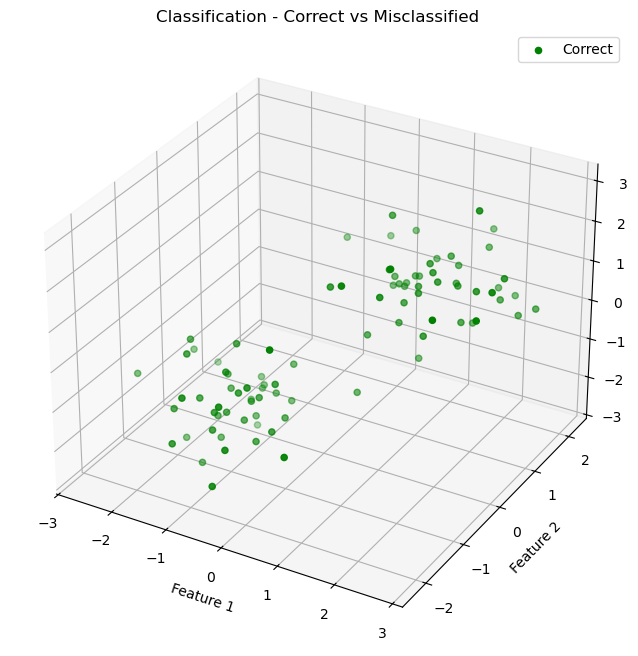

In [12]:
y_pred = lr.predict(X1_test)
y_pred = y_pred.ravel()
correct = (y_pred == y1_test)
n_mis = int(np.sum(~correct))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

#correct preds
ax.scatter(
    X1_test[correct,0],
    X1_test[correct,1],
    X1_test[correct,2],
    c="green",
    label="Correct",
    s=20
)

#incorrect preds
if n_mis > 0:
    ax.scatter(
        X1_test[~correct,0],
        X1_test[~correct,1],
        X1_test[~correct,2],
        c="red",
        label="Misclassified",
        s=50
    )

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("Classification - Correct vs Misclassified")
ax.legend()

plt.show()


## Dataset 2 - Circles 2D

In [13]:
# Use pandas to read the CSV file as a dataframe
file_name = r"../datasets/circles500.csv"
df2 = pd.read_csv(file_name)

# The y values are those labelled 'Class': extract their values
y2 = df2['Class'].values

# The x values are all other columns
del df2['Class']   # drop the 'Class' column from the dataframe
X2 = df2.values     # convert the remaining columns to a numpy array

In [14]:
# Check its dimensions

print(f"The dimensions of Dataset 2 are: {np.shape(X2)}")

The dimensions of Dataset 2 are: (500, 2)


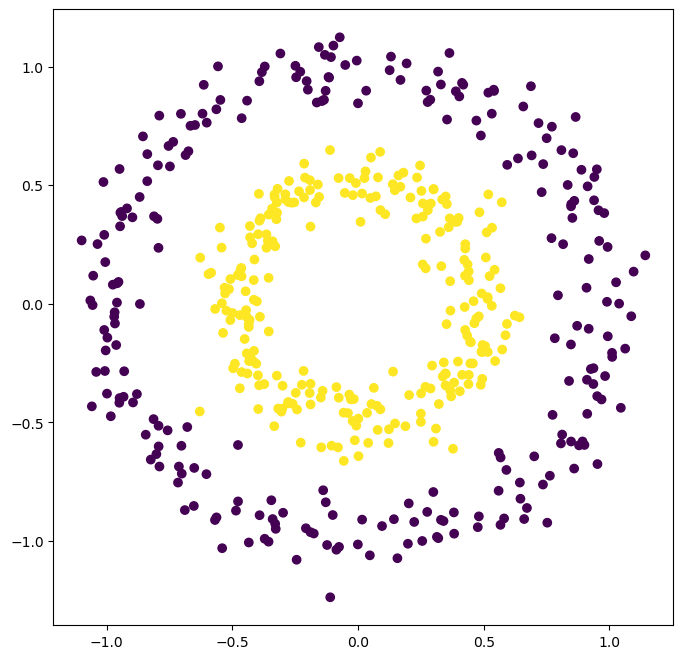

In [15]:
# plot X[0] vs X[1] and colour points according to the class, y

fig, ax = plt.subplots(figsize=(8, 8)) 

ax.scatter(X2[:,0], X2[:,1], c=y2) 

plt.show()
plt.close(fig)

In [16]:
from sklearn.model_selection import train_test_split 
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2,y2,test_size = 0.30,random_state = 42, shuffle = True)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_temp,y2_temp,test_size = 0.50,random_state = 42)

print("Dataset2 splits:")
print("Train:", X2_train.shape)
print("Validation:",X2_val.shape)
print("Test:",X2_test.shape)

Dataset2 splits:
Train: (350, 2)
Validation: (75, 2)
Test: (75, 2)


In [17]:
y2.shape

(500,)

## Examine Data

In [18]:
# Some examples of working with the data, to look at rows/columns
print ("len(X2):", len(X2))            # outer array: one per sample
print ("len(X2[0]):", len(X2[0]))      # each inner array is the attributes of one sample
print ("len(X2[:,0]):", len(X2[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X2)
print ("X2: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y2)", len(y2))
print ("np.shape(y2):", np.shape(y2))

# You can transpose the y data using 'reshape'
yt = np.reshape(y2, (len(y2),1))  
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y2 transpose: nsamples =", nsamples, ", nattribs =", nattribs)

len(X2): 500
len(X2[0]): 2
len(X2[:,0]): 500
X2: nsamples = 500 , nattribs = 2
len(y2) 500
np.shape(y2): (500,)
np.shape(yt): (500, 1)
y2 transpose: nsamples = 500 , nattribs = 1


In [19]:
from sklearn.model_selection import train_test_split 
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2,y2,test_size = 0.30,random_state = 42, shuffle = True)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_temp,y2_temp,test_size = 0.50,random_state = 42)

print("Dataset2 splits:")
print("Train:", X2_train.shape)
print("Validation:",X2_val.shape)
print("Test:",X2_test.shape)

Dataset2 splits:
Train: (350, 2)
Validation: (75, 2)
Test: (75, 2)


In [20]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from task1.LogisticRegressor import LogisticRegressor

#Creating model instance
model = LogisticRegressor(alpha = 0.01, max_iters = 100000)

#reshaping labels
y2_train_col = y2_train.reshape(-1,1)
y2_val_col = y2_val.reshape(-1,1)
y2_test_col = y2_test.reshape(-1,1)

model.fit(X2_train, y2_train_col)

train_acc = model.score(X2_train, y2_train_col)
val_acc = model.score(X2_val, y2_val_col)
test_acc = model.score(X2_test, y2_test_col)

Training accuracy: 0.358
Training accuracy: 0.64
Training accuracy: 0.5
Training accuracy: 0.5
Training accuracy: 0.36
Training accuracy: 0.586
Training accuracy: 0.596
Training accuracy: 0.642
Training accuracy: 0.5
Training accuracy: 0.502
Training accuracy: 0.5
Training accuracy: 0.5
Training accuracy: 0.5
Training accuracy: 0.49
Training accuracy: 0.4
Training accuracy: 0.41
Training accuracy: 0.64
Training accuracy: 0.5
Training accuracy: 0.58
Training accuracy: 0.62
Training accuracy: 0.564
Training accuracy: 0.5
Training accuracy: 0.5
Training accuracy: 0.428
Training accuracy: 0.62
Training accuracy: 0.544
Training accuracy: 0.522
Training accuracy: 0.514
Training accuracy: 0.508
Training accuracy: 0.436
Training accuracy: 0.634
Training accuracy: 0.5
Training accuracy: 0.5
Training accuracy: 0.6
Training accuracy: 0.546
Training accuracy: 0.502
Training accuracy: 0.392
Training accuracy: 0.5
Training accuracy: 0.5
Training accuracy: 0.474
Training accuracy: 0.578
Training accu

In [21]:
print("Dataset2 scores")
print("Training accuracy:", train_acc)
print("Validation accuracy:", val_acc)
print("Test accuracy:", test_acc)

Dataset2 scores
Training accuracy: 0.5285714285714286
Validation accuracy: 0.4
Test accuracy: 0.6133333333333333


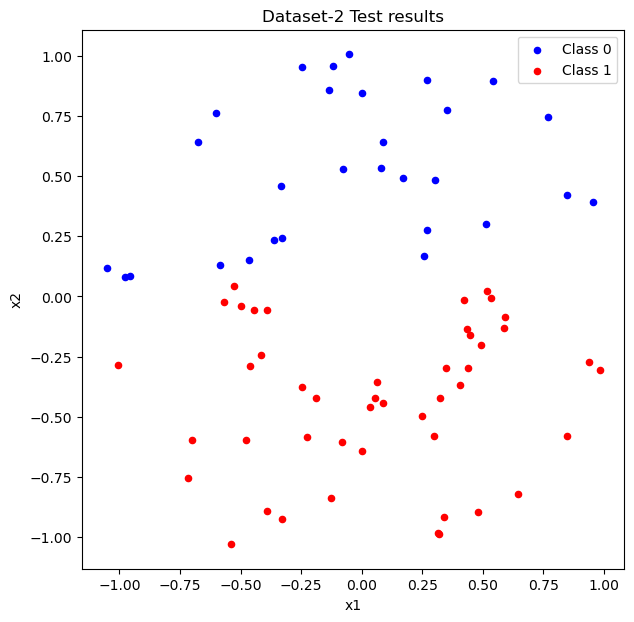

In [22]:
import matplotlib.pyplot as plt

y2_pred_test = model.predict(X2_test)
#flattening for plotting
y_pred_flat = y2_pred_test.ravel()

plt.figure(figsize = (7,7))

class0 = np.where(y_pred_flat == 0)
class1 = np.where(y_pred_flat == 1)

plt.scatter(X2_test[class0, 0], X2_test[class0, 1],color='blue', s=20, label='Class 0')
plt.scatter(X2_test[class1, 0], X2_test[class1, 1],color='red', s=20, label='Class 1')
plt.title("Dataset-2 Test results")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

The logistic regression model performs poorly on this dataset as the training accuracy is about 60% with validation and test accuracy about 46% and 62% respectively, according to the plot most points are classified into a dominant class , model fails to capture circular structure of data as logistic regression works well with linearly separable data while circles dataset is non-linearly separable, so model underfits the data .A flexible model with hidden layer is needed for this dataset to improve the accuracy